# MOVIE RECOMENDATION SYSTEM


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
columns=['user_id','item_id','rating','timestamp']

In [3]:
df=pd.read_csv('u.data',sep='\t',names=columns)

In [4]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [5]:
title=pd.read_csv('Movie_Id_Titles')

In [6]:
title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [184]:
title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
data=pd.merge(df,title,on="item_id")

In [8]:
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [9]:
data.drop(columns='timestamp')

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [10]:
sns.set_style('white')

In [11]:
data.groupby("title")['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [12]:
data.groupby("title")['rating'].count()

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [13]:
ratings=pd.DataFrame(data.groupby("title")['rating'].mean())

In [14]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [15]:
ratings['num_of_ratings']=data.groupby("title")['rating'].count()

In [16]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

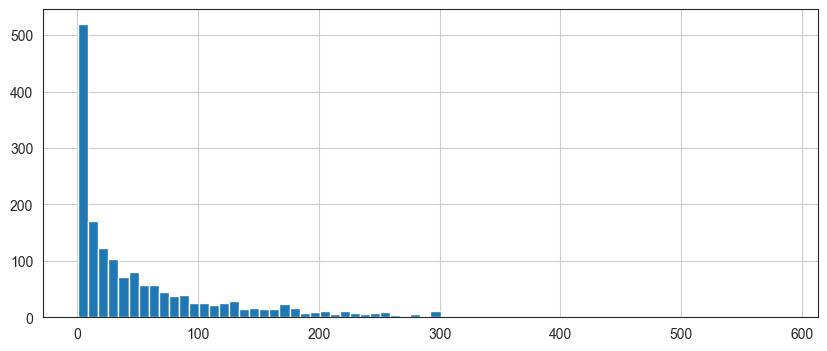

In [17]:
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=70)

<Axes: >

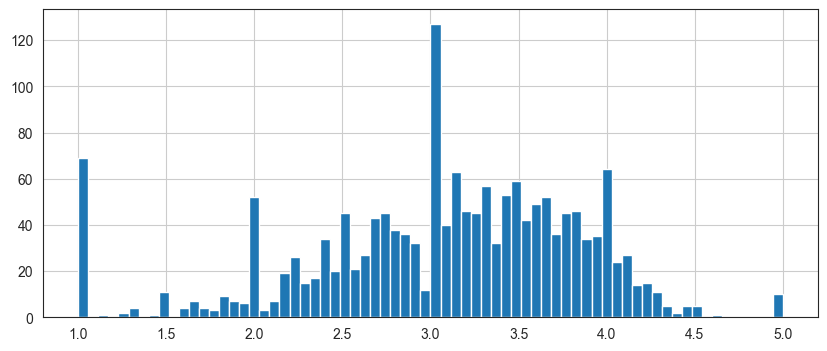

In [18]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

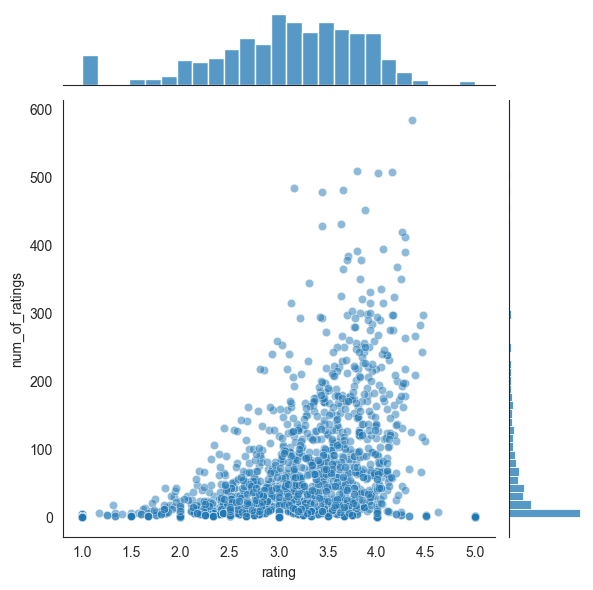

In [19]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

In [20]:
moviemat = data.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ratings.sort_values('num_of_ratings',ascending=False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [22]:
moviemat.fillna(0,inplace=True)

In [23]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def standardize(row):
    new_row=(row-row.mean())/(row.max()-row.min())
    return new_row

moviemat_std=moviemat.apply(standardize)
    

In [25]:
moviemat_std

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
1,-0.005561,-0.003443,0.332839,0.884958,-0.026271,-0.063559,0.54661,0.582203,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,0.832839,0.531356,-0.025847,-0.029025,-0.00459,0.793432,-0.001059
2,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,0.994703,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
3,-0.005561,-0.003443,-0.067161,-0.115042,0.373729,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
4,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
940,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
941,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059


In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
similarity_mat=cosine_similarity(moviemat_std.T)

In [28]:
similarity_mat

array([[ 1.        , -0.00587776, -0.0045618 , ..., -0.00671374,
         0.10263022, -0.00296024],
       [-0.00587776,  1.        , -0.00680396, ...,  0.07524803,
         0.03651169, -0.00210559],
       [-0.0045618 , -0.00680396,  1.        , ...,  0.15728435,
         0.01692501, -0.01095536],
       ...,
       [-0.00671374,  0.07524803,  0.15728435, ...,  1.        ,
        -0.0069193 , -0.00240506],
       [ 0.10263022,  0.03651169,  0.01692501, ..., -0.0069193 ,
         1.        , -0.00305088],
       [-0.00296024, -0.00210559, -0.01095536, ..., -0.00240506,
        -0.00305088,  1.        ]])

In [29]:
similarity_mat_df=pd.DataFrame(similarity_mat,index=moviemat.columns,columns=moviemat.columns)

In [30]:
similarity_mat_df

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,-0.005878,-0.004562,0.072144,0.171589,0.139004,-0.025532,0.007325,-0.006633,0.011575,...,-0.002960,-0.006929,-0.002960,-0.014438,0.095536,0.127084,0.011623,-0.006714,0.102630,-0.002960
1-900 (1994),-0.005878,1.000000,-0.006804,-0.014894,-0.005317,-0.015471,-0.007695,0.039896,-0.004718,-0.016314,...,0.150792,0.010632,-0.002106,0.045223,-0.002224,0.010540,-0.006065,0.075248,0.036512,-0.002106
101 Dalmatians (1996),-0.004562,-0.006804,1.000000,0.059375,-0.001026,0.052983,0.128832,0.078451,0.004693,0.015592,...,-0.010955,-0.002402,0.021669,0.155599,0.115300,0.039243,-0.005846,0.157284,0.016925,-0.010955
12 Angry Men (1957),0.072144,-0.014894,0.059375,1.000000,-0.014261,0.066459,0.230361,0.298878,0.050011,0.339260,...,0.052807,-0.011592,-0.012527,0.290332,0.165072,0.079418,0.038188,0.013382,0.028636,0.074586
187 (1997),0.171589,-0.005317,-0.001026,-0.014261,1.000000,0.078831,-0.010273,-0.039807,0.029612,-0.021359,...,-0.006461,0.130060,-0.006461,-0.021764,0.006881,0.053885,0.063828,0.011091,0.127496,0.091920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.127084,0.010540,0.039243,0.079418,0.053885,0.176088,0.058035,0.071820,-0.015141,0.025614,...,0.150089,-0.015816,-0.006757,0.189054,0.599658,1.000000,0.012384,-0.015324,0.082454,-0.006757
"Young Poisoner's Handbook, The (1995)",0.011623,-0.006065,-0.005846,0.038188,0.063828,0.146833,0.071166,0.065981,0.025578,0.016427,...,-0.006499,-0.001540,-0.006499,0.052071,0.038058,0.012384,1.000000,0.008699,-0.018699,0.172639
Zeus and Roxanne (1997),-0.006714,0.075248,0.157284,0.013382,0.011091,0.044406,-0.002811,-0.012762,-0.005389,0.004012,...,-0.002405,0.047694,-0.002405,0.024351,-0.024545,-0.015324,0.008699,1.000000,-0.006919,-0.002405


In [31]:
def get_similar_movies(title,rating):
    similar_scores=similarity_mat_df[title]*(rating-2.5)
    similar_scores=similar_scores.sort_values(ascending=False)
    
    return similar_scores

In [32]:
get_similar_movies("Star Wars (1977)",5)

title
Star Wars (1977)                             2.500000
Return of the Jedi (1983)                    1.866993
Empire Strikes Back, The (1980)              1.388081
Raiders of the Lost Ark (1981)               1.351137
Indiana Jones and the Last Crusade (1989)    1.168808
                                               ...   
Anna Karenina (1997)                        -0.290775
Smile Like Yours, A (1997)                  -0.301150
I Know What You Did Last Summer (1997)      -0.330378
Kiss the Girls (1997)                       -0.359823
Seven Years in Tibet (1997)                 -0.374199
Name: Star Wars (1977), Length: 1664, dtype: float64

In [33]:
action_lover=[("Star Wars (1977)",5),("12 Angry Men (1957)",1),("Raiders of the Lost Ark (1981)",4)]

similar_movies=pd.DataFrame()

for title,rating in action_lover:
    similar_movies=similar_movies.append(get_similar_movies(title,rating))

similar_movies.head()
similar_movies.sum().sort_values(ascending=False)

C:\Users\kanik\AppData\Local\Temp\ipykernel_25892\3886967653.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies=similar_movies.append(get_similar_movies(title,rating))
C:\Users\kanik\AppData\Local\Temp\ipykernel_25892\3886967653.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies=similar_movies.append(get_similar_movies(title,rating))
C:\Users\kanik\AppData\Local\Temp\ipykernel_25892\3886967653.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies=similar_movies.append(get_similar_movies(title,rating))


title
Star Wars (1977)                             2.991808
Raiders of the Lost Ark (1981)               2.429655
Return of the Jedi (1983)                    2.368038
Empire Strikes Back, The (1980)              2.045869
Indiana Jones and the Last Crusade (1989)    1.821995
                                               ...   
I Know What You Did Last Summer (1997)      -0.464534
Ice Storm, The (1997)                       -0.465455
Kiss the Girls (1997)                       -0.484112
English Patient, The (1996)                 -0.522620
12 Angry Men (1957)                         -0.547061
Length: 1664, dtype: float64

In [34]:
#user collaborative system

In [35]:
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [36]:

# Step 2: User-Item Matrix
user_item_matrix = moviemat

# Step 3: Similarity Calculation
user_similarity = cosine_similarity(user_item_matrix)



In [37]:
# Step 4: Nearest Neighbors
def find_nearest_neighbors(user_id, k):
    user_index = user_item_matrix.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]
    nearest_neighbors_indices = user_similarities.argsort()[:-k-1:-1]  # Get indices of top k similar users
    return user_item_matrix.index[nearest_neighbors_indices]



In [38]:
# Step 5: Movie Recommendation
def recommend_movies(user_id, k=5):
    nearest_neighbors = find_nearest_neighbors(user_id, k)
    user_movies = user_item_matrix.loc[user_id]
    recommendations = []
    
    for movie_title in user_movies.index:
        if user_movies[movie_title] == 0:  # User hasn't seen the movie
            movie_ratings = user_item_matrix.loc[nearest_neighbors, movie_title]
            avg_rating = movie_ratings.mean()
            recommendations.append((movie_title, avg_rating))
    
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:k]



In [39]:
# Example usage:
user_id = 123  # Replace with the desired user ID
recommendations = recommend_movies(user_id)
print(f"Recommended movies for user {user_id}:")
for movie, rating in recommendations:
    print(f"{movie} (Average rating: {rating})")

Recommended movies for user 123:
Big Night (1996) (Average rating: 3.8)
It's a Wonderful Life (1946) (Average rating: 3.8)
Philadelphia Story, The (1940) (Average rating: 3.8)
Raising Arizona (1987) (Average rating: 3.8)
Apocalypse Now (1979) (Average rating: 3.6)
